In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")

from Functions.UNSW_DF import * 

In [2]:
df = pd.read_excel("../KNN/KNN_Scores(1-15).xlsx")
df.drop("Runtime", axis=1, inplace=True)

In [3]:
df

,K,Accuracy,F1,Precision,Recall
0,1,0.852803,0.876421,0.814905,0.947984
1,2,0.871071,0.887020,0.857002,0.919218
2,3,0.850860,0.876443,0.805780,0.960690
3,4,0.863310,0.883542,0.832118,0.941741
4,5,0.846257,0.873673,0.797751,0.965565
5,6,0.856192,0.879427,0.816763,0.952506
6,7,0.843694,0.872305,0.792739,0.969624
7,8,0.852512,0.877533,0.808328,0.959697
8,9,0.841435,0.871020,0.788781,0.972404
9,10,0.848771,0.875377,0.801235,0.964639


In [4]:
df = pd.melt(df, id_vars="K", var_name="metric", value_name="score")
df

,K,metric,score
0,1,Accuracy,0.852803
1,2,Accuracy,0.871071
2,3,Accuracy,0.850860
3,4,Accuracy,0.863310
4,5,Accuracy,0.846257
5,6,Accuracy,0.856192
6,7,Accuracy,0.843694
7,8,Accuracy,0.852512
8,9,Accuracy,0.841435
9,10,Accuracy,0.848771


In [24]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [20]:
sns.set(rc={"figure.figsize":(20, 10), 'axes.facecolor':'white',})
sns.set_style("whitegrid")

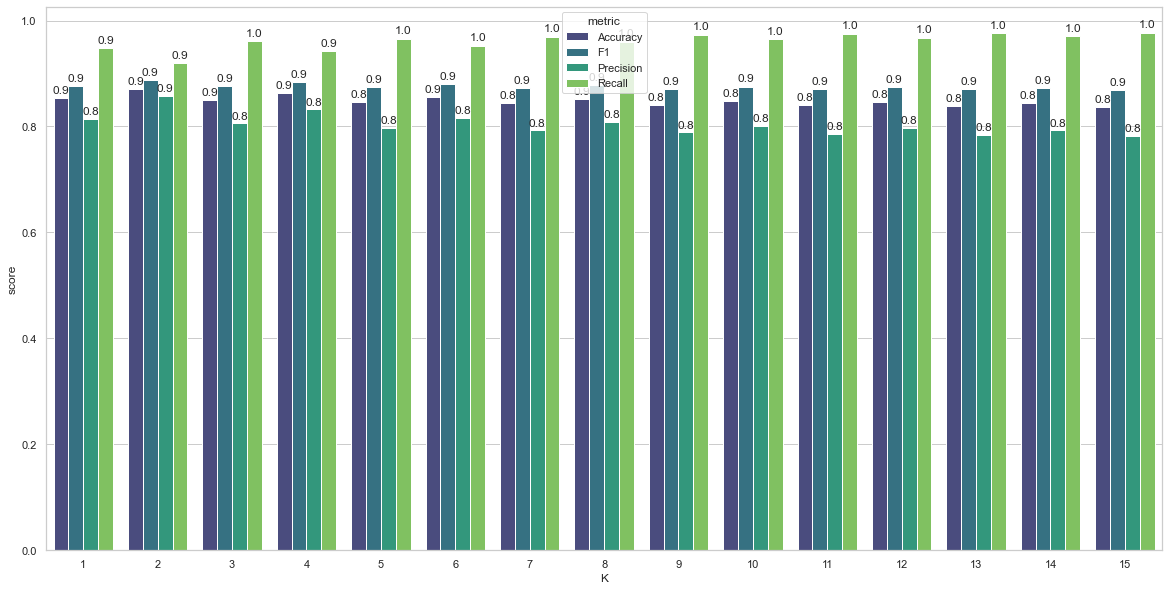

In [28]:
ax = sns.barplot(x='K', y='score', hue='metric', data=df, palette="viridis")
#show values on barplot
show_values(ax, orient="v")

#for container in ax.containers:
#    ax.bar_label(container)
#    container.set_rotation(45)
#ax.figure.savefig("performance_evaluation_v3.png", dpi=400)